In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from itertools import cycle
from matplotlib.patches import Patch

In [2]:
global bar
def textured_box(bar):
    # Define some hatches
    hatches = cycle(['///','x', '*', 'o','-', '+', '\\'])

    # Loop over the bars
    for i,thisbar in enumerate(bar.artists):
        # Set a different hatch for each bar
        thisbar.set_hatch(hatches[i])

In [3]:
global bar
global num_metrics
hatches = cycle(['///','x', '*', 'o','-', '+', '\\'])
def textured_box(bar,num_metrics):
    
    for i, patch in enumerate(bar.artists):
        # Blue bars first, then green bars
        if i % num_metrics == 0:
            hatch = next(hatches)
        patch.set_hatch(hatch)

In [4]:
global bar
def textured_box(bar):
    #Loop over the bars
    hatches = ["/", "o", "*", "\\"]
    for hatch, patch in zip(hatches, ml_trad_boxplot.artists):
        patch.set_hatch(hatch)
 

In [5]:
# ax.patches[5].set_hatch('x')
from matplotlib.patches import Patch


## Clone density distribution

In [7]:
dl_all = pd.read_csv('dl_t20_single-type/dl_t20_clean.csv')
trad_all = pd.read_csv('trad_t20_single-type/trad_t20_clean.csv')

In [8]:
dl_all_clones_java = dl_all[dl_all['language']=='java']
trad_all_clones_java = trad_all[trad_all['language']=='java']
dl_all_clones_csharp = dl_all[dl_all['language']=='csharp']
trad_all_clones_csharp = trad_all[trad_all['language']=='csharp']


In [10]:
dl_all_clones_csharp['project_type']='Deep Learning'
trad_all_clones_csharp['project_type']='Traditional'
dl_all_clones_java['project_type']='Deep Learning'
trad_all_clones_java['project_type']='Traditional'

In [9]:
dl_all_clones_java_t1 = dl_all_clones_java[dl_all_clones_java['clone_type']=='Type 1']
dl_all_clones_java_t2 = dl_all_clones_java[dl_all_clones_java['clone_type']=='Type 2']
dl_all_clones_java_t3 = dl_all_clones_java[dl_all_clones_java['clone_type']=='Type 3']
trad_all_clones_java_t1 = trad_all_clones_java[trad_all_clones_java['clone_type']=='Type 1']
trad_all_clones_java_t2 = trad_all_clones_java[trad_all_clones_java['clone_type']=='Type 2']
trad_all_clones_java_t3 = trad_all_clones_java[trad_all_clones_java['clone_type']=='Type 3']
dl_all_clones_csharp_t1 = dl_all_clones_csharp[dl_all_clones_csharp['clone_type']=='Type 1']
dl_all_clones_csharp_t2 = dl_all_clones_csharp[dl_all_clones_csharp['clone_type']=='Type 2']
dl_all_clones_csharp_t3 = dl_all_clones_csharp[dl_all_clones_csharp['clone_type']=='Type 3']
trad_all_clones_csharp_t1 = trad_all_clones_csharp[trad_all_clones_csharp['clone_type']=='Type 1']
trad_all_clones_csharp_t2 = trad_all_clones_csharp[trad_all_clones_csharp['clone_type']=='Type 2']
trad_all_clones_csharp_t3 = trad_all_clones_csharp[trad_all_clones_csharp['clone_type']=='Type 3']

In [11]:
dl_repos_size_java = pd.read_csv("data/dl_java_loc.csv")
trad_repos_size_java = pd.read_csv("data/trad_java_loc.csv")
dl_repos_size_java.shape[0]

6

In [12]:
dl_repos_size_csharp = pd.read_csv("data/dl_csharp_loc.csv")
trad_repos_size_csharp = pd.read_csv("data/trad_csharp_loc.csv")
dl_repos_size_csharp.shape[0]

14

In [14]:
dl_repos_size_java['language']='java'
dl_repos_size_java['project_type']='Deep Learning'
trad_repos_size_java['language']='java'
trad_repos_size_java['project_type']='Deep Learning'
dl_repos_size_csharp['language']='csharp'
dl_repos_size_csharp['project_type']='Deep Learning'
trad_repos_size_csharp['language']='csharp'
trad_repos_size_csharp['project_type']='Traditional'

In [15]:
otherLanguages_sloc = pd.concat([dl_repos_size_java,trad_repos_size_java])
otherLanguages_sloc = pd.concat([otherLanguages_sloc,dl_repos_size_csharp])
otherLanguages_sloc = pd.concat([otherLanguages_sloc,trad_repos_size_csharp])

In [28]:
# don't
# otherLanguages_sloc.to_csv('data/all_otherLanguages_sloc.csv', index=False)

In [17]:
dl_all['project_type']='Deep Learning'
trad_all['project_type']='Traditional'

In [18]:
all_clones = pd.concat([dl_all,trad_all])

In [19]:
all_clones.shape[0]

282411

In [20]:
def get_locc(row):
    startline=row['startline']
    endline = row['endline']
    return endline - startline +1 # added +1

In [21]:
def update_granularity(row):
    granularity=row['granularity']
    if 'block' in granularity:
        return 'Block'
    elif 'function' in granularity:
        return 'Function'
    else:
        return row.granularity

In [22]:
all_clones['locc']=all_clones.apply(get_locc, axis=1)
all_clones.shape[0]

282411

In [23]:
# all_clones['granularity']=all_clones.apply(update_granularity, axis=1)
all_clones.head()

,repoName,clone_type,classid,similarity,granularity,file,startline,endline,language,project_type,locc
0,SharpNet,type 1,1,100,Function,/tmpstore/bimus/repositories/csharp/SharpNet/P...,816,822,csharp,Deep Learning,7
1,SharpNet,type 1,1,100,Function,/tmpstore/bimus/repositories/csharp/SharpNet/P...,1028,1034,csharp,Deep Learning,7
2,SharpNet,type 1,2,100,Function,/tmpstore/bimus/repositories/csharp/SharpNet/P...,64,73,csharp,Deep Learning,10
3,SharpNet,type 1,2,100,Function,/tmpstore/bimus/repositories/csharp/SharpNet/P...,50,59,csharp,Deep Learning,10
4,KelpNet,type 1,1,100,Block,/tmpstore/bimus/repositories/csharp/KelpNet/Ke...,13,33,csharp,Deep Learning,21


In [24]:
all_clones.to_csv('data/all_dl_trad_clones_20.csv', index=False)

In [23]:
# load clones if preprocessed and saved
all_clones= pd.read_csv('data/all_dl_trad_clones_20.csv')

In [25]:
clones_by_type = all_clones.groupby(['repoName','granularity','clone_type','language','project_type']).agg({'locc':'sum'}).reset_index()

In [134]:
trad_repos_size_java = pd.read_csv("data/otherLanguages/trad_java_loc.csv")
trad_repos_size_java['repo'] = trad_repos_size_java['repoName_path'].apply(lambda x: x.split('/')[-1])
trad_repos_size_csharp = pd.read_csv("data/otherLanguages/trad_csharp_loc.csv")
trad_repos_size = pd.concat([trad_repos_size_java,trad_repos_size_csharp])
repos_size = pd.concat([dl_repos_size, trad_repos_size])
repos_size.rename(columns={'repo':'repoName'}, inplace=True)
repos_size.shape[0]

40

In [135]:
repos_size['repoName'].unique()

array(['neuralnetworks', 'SANNet', 'DeepDriver', 'deeplearning4j',
       'knime-deeplearning', 'djl', 'ConvNetSharp', 'SiaNet', 'KelpNet',
       'MyCaffe', 'RNNSharp', 'SharpNet', 'TensorShader', 'keras-sharp',
       'CeNiN', 'Seq2SeqSharp', 'Vortex', 'FaceONNX', 'NeuralNetwork.NET',
       'Keras.NET', 'spring-framework', 'framework', 'okhttp', 'retrofit',
       'dubbo', 'MPAndroidChart', 'EntityFramework.Extended',
       'LockstepFramework', 'AspectCore-Framework',
       'Pomelo.EntityFrameworkCore.MySql', 'aspnetboilerplate',
       'MassTransit', 'shadowsocks-windows', 'PowerShell', 'ShareX',
       'ScreenToGif', 'Dapper', 'Avalonia', 'jellyfin', 'efcore'],
      dtype=object)

In [93]:
otherLanguages_sloc = pd.read_csv('data/all_otherLanguages_sloc.csv')

In [95]:
sloc = otherLanguages_sloc[['repoName', 'total_sloc']]

In [96]:
repos_clones_size = pd.merge(clones_by_type,sloc,how='left', on=['repoName'])
repos_clones_size.head()

,repoName,granularity,clone_type,language,project_type,locc,total_sloc
0,AspectCore-Framework,Block,type 1,csharp,Traditional,497,17316
1,AspectCore-Framework,Block,type 2,csharp,Traditional,1176,17316
2,AspectCore-Framework,Block,type 3,csharp,Traditional,2811,17316
3,AspectCore-Framework,Function,type 1,csharp,Traditional,134,17316
4,AspectCore-Framework,Function,type 2,csharp,Traditional,939,17316


In [97]:
repos_clones_size = repos_clones_size[repos_clones_size['total_sloc'] !=0]

In [98]:
repos_clones_size['LOCC / total SLOC'] = repos_clones_size['locc']/repos_clones_size['total_sloc']

In [99]:
repos_clones_size['LOCC_total_SLOC'] = repos_clones_size['locc']/repos_clones_size['total_sloc']

In [140]:
repos_clones_size.shape[0]

231

In [100]:
repos_clones_size.to_csv('data/repos_clones_size_all_20.csv', index=False)

In [101]:
def runs(lst):
    "Iterator, chunks repeated values"
    for j,two in enumerate(lst):
        if j == 0:
            one,i = two,0
        if one!=two:
            yield j - i,one
            i = j
        one=two
    yield j - i + 1, two

def cliffsDelta(lst1,lst2): 
    "Returns true if there are more than 'dull' differences"
    m, n = len(lst1), len(lst2)
    lst2 = sorted(lst2)
    j = more = less = 0
    for repeats,x in runs(sorted(lst1)):
        while j <= (n - 1) and lst2[j] <  x: 
            j += 1
        more += j*repeats
        while j <= (n - 1) and lst2[j] == x: 
            j += 1
        less += (n - j)*repeats
    d= (more - less) / (m*n) 
    return abs(d)

In [102]:
# load data if preprocessed and saved
repos_clones_size= pd.read_csv('data/repos_clones_size_all_20.csv')

In [104]:
repos_clones_size.head()

,repoName,granularity,clone_type,language,project_type,locc,total_sloc,LOCC / total SLOC,LOCC_total_SLOC
0,AspectCore-Framework,Block,type 1,csharp,Traditional,497,17316,0.028702,0.028702
1,AspectCore-Framework,Block,type 2,csharp,Traditional,1176,17316,0.067914,0.067914
2,AspectCore-Framework,Block,type 3,csharp,Traditional,2811,17316,0.162335,0.162335
3,AspectCore-Framework,Function,type 1,csharp,Traditional,134,17316,0.007739,0.007739
4,AspectCore-Framework,Function,type 2,csharp,Traditional,939,17316,0.054227,0.054227


In [105]:
repos_clones_size['granularity']=repos_clones_size.apply(update_granularity, axis=1)
repos_clones_size.head()

,repoName,granularity,clone_type,language,project_type,locc,total_sloc,LOCC / total SLOC,LOCC_total_SLOC
0,AspectCore-Framework,Block,type 1,csharp,Traditional,497,17316,0.028702,0.028702
1,AspectCore-Framework,Block,type 2,csharp,Traditional,1176,17316,0.067914,0.067914
2,AspectCore-Framework,Block,type 3,csharp,Traditional,2811,17316,0.162335,0.162335
3,AspectCore-Framework,Function,type 1,csharp,Traditional,134,17316,0.007739,0.007739
4,AspectCore-Framework,Function,type 2,csharp,Traditional,939,17316,0.054227,0.054227


In [106]:
repos_clones_size_all = repos_clones_size
repos_clones_size_all.head()

,repoName,granularity,clone_type,language,project_type,locc,total_sloc,LOCC / total SLOC,LOCC_total_SLOC
0,AspectCore-Framework,Block,type 1,csharp,Traditional,497,17316,0.028702,0.028702
1,AspectCore-Framework,Block,type 2,csharp,Traditional,1176,17316,0.067914,0.067914
2,AspectCore-Framework,Block,type 3,csharp,Traditional,2811,17316,0.162335,0.162335
3,AspectCore-Framework,Function,type 1,csharp,Traditional,134,17316,0.007739,0.007739
4,AspectCore-Framework,Function,type 2,csharp,Traditional,939,17316,0.054227,0.054227


In [107]:
for index1, row1 in repos_clones_size_all.iterrows():
    print('{} {} {} {}'.format(row1['repoName'], row1['granularity'], row1['clone_type'], row1['language']))
    

AspectCore-Framework Block type 1 csharp
AspectCore-Framework Block type 2 csharp
AspectCore-Framework Block type 3 csharp
AspectCore-Framework Function type 1 csharp
AspectCore-Framework Function type 2 csharp
AspectCore-Framework Function type 3 csharp
Avalonia Block type 1 csharp
Avalonia Block type 2 csharp
Avalonia Block type 3 csharp
Avalonia Function type 1 csharp
Avalonia Function type 2 csharp
Avalonia Function type 3 csharp
CeNiN Block type 1 csharp
CeNiN Block type 2 csharp
CeNiN Block type 3 csharp
CeNiN Function type 1 csharp
CeNiN Function type 3 csharp
ConvNetSharp Block type 1 csharp
ConvNetSharp Block type 2 csharp
ConvNetSharp Block type 3 csharp
ConvNetSharp Function type 1 csharp
ConvNetSharp Function type 2 csharp
ConvNetSharp Function type 3 csharp
Dapper Block type 1 csharp
Dapper Block type 2 csharp
Dapper Block type 3 csharp
Dapper Function type 1 csharp
Dapper Function type 2 csharp
Dapper Function type 3 csharp
DeepDriver Block type 1 java
DeepDriver Block ty

# RQ1-Java

In [108]:
repos_clones_size = repos_clones_size_all
repos_clones_size_java= repos_clones_size[repos_clones_size['language']=='java']
repos_clones_size_java_fct = repos_clones_size_java[repos_clones_size_java['granularity']=='Function']
repos_clones_size_java_blk = repos_clones_size_java[repos_clones_size_java['granularity']=='Block']

In [109]:
repos_clones_size_java_fct.head()

,repoName,granularity,clone_type,language,project_type,locc,total_sloc,LOCC / total SLOC,LOCC_total_SLOC
32,DeepDriver,Function,type 1,java,Deep Learning,3510,32265,0.108787,0.108787
33,DeepDriver,Function,type 2,java,Deep Learning,1630,32265,0.050519,0.050519
34,DeepDriver,Function,type 3,java,Deep Learning,6446,32265,0.199783,0.199783
66,MPAndroidChart,Function,type 1,java,Traditional,390,25232,0.015457,0.015457
67,MPAndroidChart,Function,type 2,java,Traditional,818,25232,0.032419,0.032419


In [110]:
repos_clones_size_java_blk.head()

,repoName,granularity,clone_type,language,project_type,locc,total_sloc,LOCC / total SLOC,LOCC_total_SLOC
29,DeepDriver,Block,type 1,java,Deep Learning,5790,32265,0.179451,0.179451
30,DeepDriver,Block,type 2,java,Deep Learning,2891,32265,0.089602,0.089602
31,DeepDriver,Block,type 3,java,Deep Learning,10435,32265,0.323415,0.323415
63,MPAndroidChart,Block,type 1,java,Traditional,1969,25232,0.078036,0.078036
64,MPAndroidChart,Block,type 2,java,Traditional,2590,25232,0.102647,0.102647


In [111]:
java_fct=repos_clones_size_java_fct[repos_clones_size_java_fct['language']=='java']
java_fct_t1=java_fct[java_fct['clone_type']=='type 1']
java_fct_t1.head()

,repoName,granularity,clone_type,language,project_type,locc,total_sloc,LOCC / total SLOC,LOCC_total_SLOC
32,DeepDriver,Function,type 1,java,Deep Learning,3510,32265,0.108787,0.108787
66,MPAndroidChart,Function,type 1,java,Traditional,390,25232,0.015457,0.015457
108,SANNet,Function,type 1,java,Deep Learning,319,16172,0.019725,0.019725
162,deeplearning4j,Function,type 1,java,Deep Learning,14017,526195,0.026638,0.026638
168,djl,Function,type 1,java,Deep Learning,1002,74161,0.013511,0.013511


## Java All Types Function granularity

In [112]:
repos_clones_size = repos_clones_size_java_fct

In [113]:
traditional = repos_clones_size[repos_clones_size['project_type']=='Traditional']
dl = repos_clones_size[repos_clones_size['project_type']=='Deep Learning']

In [115]:
stats.mannwhitneyu(traditional.LOCC_total_SLOC,dl.LOCC_total_SLOC)

MannwhitneyuResult(statistic=155.0, pvalue=0.4185318077449268)

In [116]:
stats.mannwhitneyu(traditional.LOCC_total_SLOC,dl.LOCC_total_SLOC, alternative='two-sided')

MannwhitneyuResult(statistic=155.0, pvalue=0.8370636154898536)

In [117]:
stats.mannwhitneyu(dl.LOCC_total_SLOC,traditional.LOCC_total_SLOC, alternative='two-sided')

MannwhitneyuResult(statistic=169.0, pvalue=0.8370636154898536)

In [118]:
cliffsDelta(traditional.LOCC_total_SLOC,dl.LOCC_total_SLOC)

0.043209876543209874

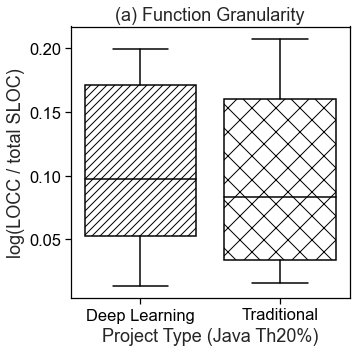

In [202]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set(font_scale=1.5)
sns.set_style('white')
sns.set_style('ticks', {'axes.edgecolor': '0',  
                        'xtick.color': '0',
                        'ytick.color': '0'})
# Define some hatches
hatches = cycle(['///','x', 'o'])


# Boxplot
ax = sns.boxplot(x="project_type", y="LOCC / total SLOC", data=repos_clones_size_java_fct, order=["Deep Learning", "Traditional"], showfliers=False,color='black',medianprops=dict(color='black'), 
                  boxprops = dict(facecolor='white',edgecolor='black' ))
#ax.set_yscale("log")
ax.set(xlabel='Project Type (Java Th20%)', ylabel='log(LOCC / total SLOC)')
#plt.legend(loc='best')
plt.title('(a) Function Granularity')
patches=[]
for i, patch in enumerate(ax.artists):
    # Boxes from left to right
    hatch = next(hatches)
    patch.set_hatch(hatch)
    if patch not in patches:
        patches.append(patch)

plt.show()
fig = ax.get_figure()
fig.savefig("images_pdf/java_dl_trad_all_clone_type_fct_20.pdf",bbox_inches='tight')

## Java- All Types Block granularity

In [120]:
repos_clones_size = repos_clones_size_java_blk

In [121]:
traditional = repos_clones_size[repos_clones_size['project_type']=='Traditional']
dl = repos_clones_size[repos_clones_size['project_type']=='Deep Learning']

In [122]:
stats.mannwhitneyu(traditional.LOCC_total_SLOC,dl.LOCC_total_SLOC)

MannwhitneyuResult(statistic=120.0, pvalue=0.3000528188066002)

In [123]:
stats.mannwhitneyu(traditional.LOCC_total_SLOC,dl.LOCC_total_SLOC, alternative='two-sided')

MannwhitneyuResult(statistic=120.0, pvalue=0.6001056376132003)

In [124]:
stats.mannwhitneyu(dl.LOCC_total_SLOC,traditional.LOCC_total_SLOC, alternative='two-sided')

MannwhitneyuResult(statistic=150.0, pvalue=0.6001056376132003)

In [125]:
cliffsDelta(traditional.LOCC_total_SLOC,dl.LOCC_total_SLOC)

0.1111111111111111

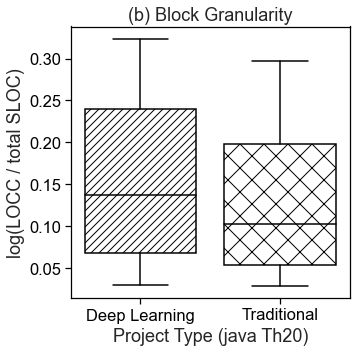

In [203]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set(font_scale=1.5)
sns.set_style('white')
sns.set_style('ticks', {'axes.edgecolor': '0',  
                        'xtick.color': '0',
                        'ytick.color': '0'})
# Define some hatches
hatches = cycle(['///','x', 'o'])


# Boxplot
ax = sns.boxplot(x="project_type", y="LOCC / total SLOC", data=repos_clones_size_java_blk,order=["Deep Learning", "Traditional"], showfliers=False,color='black',medianprops=dict(color='black'), 
                  boxprops = dict(facecolor='white',edgecolor='black' ))
#ax.set_yscale("log")
ax.set(xlabel='Project Type (java Th20)', ylabel='log(LOCC / total SLOC)')
#plt.legend(loc='best')
plt.title('(b) Block Granularity')
patches=[]
for i, patch in enumerate(ax.artists):
    # Boxes from left to right
    hatch = next(hatches)
    patch.set_hatch(hatch)
    if patch not in patches:
        patches.append(patch)

plt.show()
fig = ax.get_figure()
fig.savefig("images_pdf/java_dl_trad_all_clone_type_blk_20.pdf",bbox_inches='tight')

## Java -By Clone Types-Function granularity

In [208]:
repos_clones_size = repos_clones_size_java_fct
traditional = repos_clones_size[repos_clones_size['project_type']=='Traditional']
dl = repos_clones_size[repos_clones_size['project_type']=='Deep Learning']

In [209]:
def capitalize(row):
    return row['clone_type'].capitalize()

In [210]:
traditional['clone_type'] = traditional.apply(capitalize, axis=1)
dl['clone_type'] = dl.apply(capitalize, axis=1)

In [211]:
trad_type1 = traditional[traditional['clone_type']=='Type 1']
trad_type2 = traditional[traditional['clone_type']=='Type 2']
trad_type3 = traditional[traditional['clone_type']=='Type 3']

dl_type1 = dl[dl['clone_type']=='Type 1']
dl_type2 = dl[dl['clone_type']=='Type 2']
dl_type3 = dl[dl['clone_type']=='Type 3']

In [212]:
trad_type1.head()

,repoName,granularity,clone_type,language,project_type,locc,total_sloc,LOCC / total SLOC,LOCC_total_SLOC
66,MPAndroidChart,Function,Type 1,java,Traditional,390,25232,0.015457,0.015457
171,dubbo,Function,Type 1,java,Traditional,13175,174064,0.075691,0.075691
183,framework,Function,Type 1,java,Traditional,24808,437134,0.056751,0.056751
212,okhttp,Function,Type 1,java,Traditional,1113,37217,0.029906,0.029906
218,retrofit,Function,Type 1,java,Traditional,4617,26513,0.174141,0.174141


In [213]:
stats.mannwhitneyu(trad_type1.LOCC_total_SLOC,dl_type1.LOCC_total_SLOC, alternative='two-sided')

MannwhitneyuResult(statistic=19.0, pvalue=0.9361862934730594)

In [142]:
stats.mannwhitneyu(trad_type2.LOCC_total_SLOC,dl_type2.LOCC_total_SLOC, alternative='two-sided')

MannwhitneyuResult(statistic=14.0, pvalue=0.5751735319201967)

In [143]:
stats.mannwhitneyu(trad_type3.LOCC_total_SLOC,dl_type3.LOCC_total_SLOC, alternative='two-sided')

MannwhitneyuResult(statistic=17.0, pvalue=0.9361862934730594)

In [144]:
trad_type1.head()

,repoName,granularity,clone_type,language,project_type,locc,total_sloc,LOCC / total SLOC,LOCC_total_SLOC
66,MPAndroidChart,Function,Type 1,java,Traditional,390,25232,0.015457,0.015457
171,dubbo,Function,Type 1,java,Traditional,13175,174064,0.075691,0.075691
183,framework,Function,Type 1,java,Traditional,24808,437134,0.056751,0.056751
212,okhttp,Function,Type 1,java,Traditional,1113,37217,0.029906,0.029906
218,retrofit,Function,Type 1,java,Traditional,4617,26513,0.174141,0.174141


In [145]:
dl_type1.head()

,repoName,granularity,clone_type,language,project_type,locc,total_sloc,LOCC / total SLOC,LOCC_total_SLOC
32,DeepDriver,Function,Type 1,java,Deep Learning,3510,32265,0.108787,0.108787
108,SANNet,Function,Type 1,java,Deep Learning,319,16172,0.019725,0.019725
162,deeplearning4j,Function,Type 1,java,Deep Learning,14017,526195,0.026638,0.026638
168,djl,Function,Type 1,java,Deep Learning,1002,74161,0.013511,0.013511
200,knime-deeplearning,Function,Type 1,java,Deep Learning,4249,49445,0.085934,0.085934


In [146]:
cliffsDelta(trad_type1.LOCC_total_SLOC,dl_type1.LOCC_total_SLOC)

0.05555555555555555

In [147]:
cliffsDelta(trad_type2.LOCC_total_SLOC,dl_type2.LOCC_total_SLOC)

0.2222222222222222

In [148]:
cliffsDelta(trad_type3.LOCC_total_SLOC,dl_type3.LOCC_total_SLOC)

0.05555555555555555

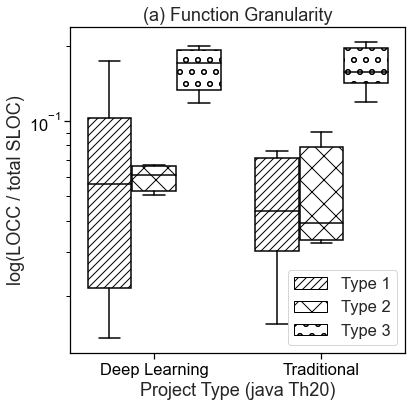

In [227]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set(font_scale=1.5)
sns.set_style('white')
sns.set_style('ticks', {'axes.edgecolor': '0',  
                        'xtick.color': '0',
                        'ytick.color': '0'})
# Define some hatches
hatches = cycle(['///','x', 'o'])


# Boxplot
ax = sns.boxplot(x="project_type", y="LOCC / total SLOC", data=repos_clones_size_java_fct,order=["Deep Learning", "Traditional"],
                 showfliers=False, hue='clone_type',color='black',medianprops=dict(color='black'), 
                  boxprops = dict(facecolor='white',edgecolor='black' ))
ax.set_yscale("log")
ax.set(xlabel='Project Type (java Th20)', ylabel='log(LOCC / total SLOC)')
#plt.legend(loc='best')
plt.title('(a) Function Granularity')
patches=[]
for i, patch in enumerate(ax.artists):
    # Boxes from left to right
    hatch = next(hatches)
    patch.set_hatch(hatch)
    if patch not in patches:
        patches.append(patch)

type1_patch = Patch(fc='white',edgecolor='black', label='Type 1', hatch='///')
type2_patch = Patch( fc='white',edgecolor='black',label='Type 2',     hatch ='x')
type3_patch = Patch(fc='white',edgecolor='black', label='Type 3',     hatch ='o')
legend=plt.legend(handles=[type1_patch, type2_patch, type3_patch],loc='best')
frame = legend.get_frame()
plt.show()
fig = ax.get_figure()
fig.savefig("images_pdf/java_dl_trad_clone_types_fct_20.pdf",bbox_inches='tight')

## Java -By Clone Types-Block granularity

In [216]:
repos_clones_size = repos_clones_size_java_blk
traditional = repos_clones_size[repos_clones_size['project_type']=='Traditional']
dl = repos_clones_size[repos_clones_size['project_type']=='Deep Learning']

In [217]:
traditional['clone_type'] = traditional.apply(capitalize, axis=1)
dl['clone_type'] = dl.apply(capitalize, axis=1)

In [218]:
trad_type1 = traditional[traditional['clone_type']=='Type 1']
trad_type2 = traditional[traditional['clone_type']=='Type 2']
trad_type3 = traditional[traditional['clone_type']=='Type 3']

dl_type1 = dl[dl['clone_type']=='Type 1']
dl_type2 = dl[dl['clone_type']=='Type 2']
dl_type3 = dl[dl['clone_type']=='Type 3']

In [219]:
stats.mannwhitneyu(trad_type1.LOCC_total_SLOC,dl_type1.LOCC_total_SLOC, alternative='two-sided')

MannwhitneyuResult(statistic=14.0, pvalue=0.9272644735252321)

In [154]:
stats.mannwhitneyu(trad_type2.LOCC_total_SLOC,dl_type2.LOCC_total_SLOC, alternative='two-sided')

MannwhitneyuResult(statistic=12.0, pvalue=0.6480768681391461)

In [155]:
stats.mannwhitneyu(trad_type3.LOCC_total_SLOC,dl_type3.LOCC_total_SLOC, alternative='two-sided')

MannwhitneyuResult(statistic=15.0, pvalue=0.9272644735252321)

In [156]:
cliffsDelta(trad_type1.LOCC_total_SLOC,dl_type1.LOCC_total_SLOC)

0.06666666666666667

In [157]:
cliffsDelta(trad_type2.LOCC_total_SLOC,dl_type2.LOCC_total_SLOC)

0.2

In [159]:
cliffsDelta(trad_type3.LOCC_total_SLOC,dl_type3.LOCC_total_SLOC)

0.0

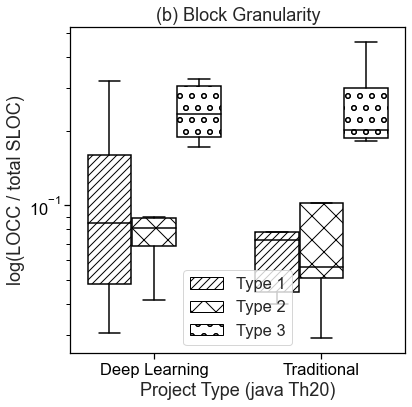

In [226]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set(font_scale=1.5)
sns.set_style('white')
sns.set_style('ticks', {'axes.edgecolor': '0',  
                        'xtick.color': '0',
                        'ytick.color': '0'})
# Define some hatches
hatches = cycle(['///','x', 'o'])


# Boxplot
ax = sns.boxplot(x="project_type", y="LOCC / total SLOC", data=repos_clones_size_java_blk, order=["Deep Learning", "Traditional"],
                 showfliers=False, hue='clone_type',color='black',medianprops=dict(color='black'), 
                  boxprops = dict(facecolor='white',edgecolor='black' ))
ax.set_yscale("log")
ax.set(xlabel='Project Type (java Th20)', ylabel='log(LOCC / total SLOC)')
#plt.legend(loc='best')
plt.title('(b) Block Granularity')
patches=[]
for i, patch in enumerate(ax.artists):
    # Boxes from left to right
    hatch = next(hatches)
    patch.set_hatch(hatch)
    if patch not in patches:
        patches.append(patch)

type1_patch = Patch(fc='white',edgecolor='black', label='Type 1', hatch='///')
type2_patch = Patch( fc='white',edgecolor='black',label='Type 2',     hatch ='x')
type3_patch = Patch(fc='white',edgecolor='black', label='Type 3',     hatch ='o')
legend=plt.legend(handles=[type1_patch, type2_patch, type3_patch],loc='lower center')
frame = legend.get_frame()
plt.show()
fig = ax.get_figure()
fig.savefig("images_pdf/java_dl_trad_clone_types_blk_20.pdf",bbox_inches='tight')

# RQ1-C#

In [228]:
repos_clones_size = repos_clones_size_all
repos_clones_size_csharp= repos_clones_size[repos_clones_size['language']=='csharp']
repos_clones_size_csharp_fct = repos_clones_size_csharp[repos_clones_size_csharp['granularity']=='Function']
repos_clones_size_csharp_blk = repos_clones_size_csharp[repos_clones_size_csharp['granularity']=='Block']

In [124]:
repos_clones_size_csharp_fct.head()

,repoName,granularity,clone_type,language,project_type,locc,repoName_path,total_sloc,LOCC / total SLOC,LOCC_total_SLOC
3,AspectCore-Framework,Function,Type 1,csharp,Traditional,134,/tmpstore/bimus/b-repositories/trad/csharp/Asp...,17316,0.007739,0.007739
4,AspectCore-Framework,Function,Type 2,csharp,Traditional,939,/tmpstore/bimus/b-repositories/trad/csharp/Asp...,17316,0.054227,0.054227
5,AspectCore-Framework,Function,Type 3,csharp,Traditional,3411,/tmpstore/bimus/b-repositories/trad/csharp/Asp...,17316,0.196985,0.196985
9,Avalonia,Function,Type 1,csharp,Traditional,1874,/tmpstore/bimus/b-repositories/trad/csharp/Ava...,245432,0.007636,0.007636
10,Avalonia,Function,Type 2,csharp,Traditional,8725,/tmpstore/bimus/b-repositories/trad/csharp/Ava...,245432,0.035550,0.035550


In [125]:
repos_clones_size_csharp_blk.head()

,repoName,granularity,clone_type,language,project_type,locc,repoName_path,total_sloc,LOCC / total SLOC,LOCC_total_SLOC
0,AspectCore-Framework,Block,Type 1,csharp,Traditional,497,/tmpstore/bimus/b-repositories/trad/csharp/Asp...,17316,0.028702,0.028702
1,AspectCore-Framework,Block,Type 2,csharp,Traditional,1176,/tmpstore/bimus/b-repositories/trad/csharp/Asp...,17316,0.067914,0.067914
2,AspectCore-Framework,Block,Type 3,csharp,Traditional,4311,/tmpstore/bimus/b-repositories/trad/csharp/Asp...,17316,0.248960,0.248960
6,Avalonia,Block,Type 1,csharp,Traditional,4000,/tmpstore/bimus/b-repositories/trad/csharp/Ava...,245432,0.016298,0.016298
7,Avalonia,Block,Type 2,csharp,Traditional,12869,/tmpstore/bimus/b-repositories/trad/csharp/Ava...,245432,0.052434,0.052434


## C\# All Types Function granularity

In [229]:
repos_clones_size = repos_clones_size_csharp_fct

In [230]:
traditional = repos_clones_size[repos_clones_size['project_type']=='Traditional']
dl = repos_clones_size[repos_clones_size['project_type']=='Deep Learning']

In [166]:
stats.mannwhitneyu(traditional.LOCC_total_SLOC,dl.LOCC_total_SLOC)

MannwhitneyuResult(statistic=653.0, pvalue=0.10908321457834286)

In [167]:
stats.mannwhitneyu(traditional.LOCC_total_SLOC,dl.LOCC_total_SLOC, alternative='two-sided')

MannwhitneyuResult(statistic=653.0, pvalue=0.21816642915668572)

In [168]:
stats.mannwhitneyu(dl.LOCC_total_SLOC,traditional.LOCC_total_SLOC, alternative='two-sided')

MannwhitneyuResult(statistic=905.0, pvalue=0.21816642915668572)

In [169]:
cliffsDelta(traditional.LOCC_total_SLOC,dl.LOCC_total_SLOC)

0.16174582798459564

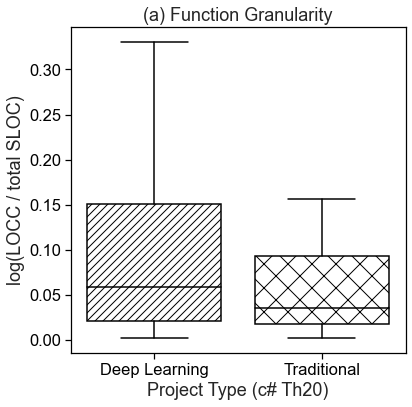

In [231]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set(font_scale=1.5)
sns.set_style('white')
sns.set_style('ticks', {'axes.edgecolor': '0',  
                        'xtick.color': '0',
                        'ytick.color': '0'})
# Define some hatches
hatches = cycle(['///','x', 'o'])


# Boxplot
ax = sns.boxplot(x="project_type", y="LOCC / total SLOC", data=repos_clones_size_csharp_fct, order=["Deep Learning", "Traditional"], showfliers=False,color='black',medianprops=dict(color='black'), 
                  boxprops = dict(facecolor='white',edgecolor='black' ))
#ax.set_yscale("log")
ax.set(xlabel='Project Type (c# Th20)', ylabel='log(LOCC / total SLOC)')
#plt.legend(loc='best')
plt.title('(a) Function Granularity')
patches=[]
for i, patch in enumerate(ax.artists):
    # Boxes from left to right
    hatch = next(hatches)
    patch.set_hatch(hatch)
    if patch not in patches:
        patches.append(patch)

#type1_patch = Patch(fc='white',edgecolor='black', label='Type 1', hatch='///')
#type2_patch = Patch( fc='white',edgecolor='black',label='Type 2',     hatch ='x')
#type3_patch = Patch(fc='white',edgecolor='black', label='Type 3',     hatch ='o')
#legend=plt.legend(handles=[type1_patch, type2_patch, type3_patch],loc='best')
#frame = legend.get_frame()
plt.show()
fig = ax.get_figure()
fig.savefig("images_pdf/csharp_dl_trad_all_clone_type_fct_20.pdf",bbox_inches='tight')

## C\#- All Types Block granularity

In [232]:
repos_clones_size = repos_clones_size_csharp_blk

In [233]:
traditional = repos_clones_size[repos_clones_size['project_type']=='Traditional']
dl = repos_clones_size[repos_clones_size['project_type']=='Deep Learning']

In [234]:
stats.mannwhitneyu(traditional.LOCC_total_SLOC,dl.LOCC_total_SLOC)

MannwhitneyuResult(statistic=729.0, pvalue=0.11551041172083781)

In [235]:
stats.mannwhitneyu(traditional.LOCC_total_SLOC,dl.LOCC_total_SLOC, alternative='two-sided')

MannwhitneyuResult(statistic=729.0, pvalue=0.23102082344167563)

In [236]:
stats.mannwhitneyu(dl.LOCC_total_SLOC,traditional.LOCC_total_SLOC, alternative='two-sided')

MannwhitneyuResult(statistic=993.0, pvalue=0.23102082344167563)

In [237]:
cliffsDelta(traditional.LOCC_total_SLOC,dl.LOCC_total_SLOC)

0.15331010452961671

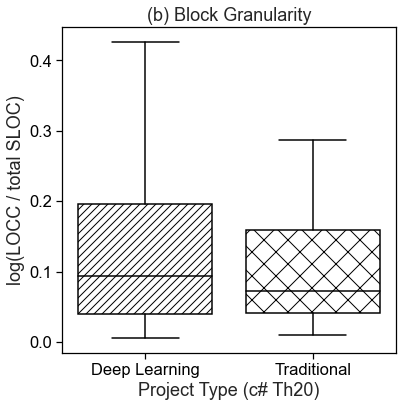

In [239]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set(font_scale=1.5)
sns.set_style('white')
sns.set_style('ticks', {'axes.edgecolor': '0',  
                        'xtick.color': '0',
                        'ytick.color': '0'})
# Define some hatches
hatches = cycle(['///','x', 'o'])


# Boxplot
ax = sns.boxplot(x="project_type", y="LOCC / total SLOC", data=repos_clones_size_csharp_blk,order=["Deep Learning", "Traditional"],
                 showfliers=False,color='black',medianprops=dict(color='black'), 
                  boxprops = dict(facecolor='white',edgecolor='black' ))
#ax.set_yscale("log")
ax.set(xlabel='Project Type (c# Th20)', ylabel='log(LOCC / total SLOC)')
#plt.legend(loc='best')
plt.title('(b) Block Granularity')
patches=[]
for i, patch in enumerate(ax.artists):
    # Boxes from left to right
    hatch = next(hatches)
    patch.set_hatch(hatch)
    if patch not in patches:
        patches.append(patch)

#type1_patch = Patch(fc='white',edgecolor='black', label='Type 1', hatch='///')
#type2_patch = Patch( fc='white',edgecolor='black',label='Type 2',     hatch ='x')
#type3_patch = Patch(fc='white',edgecolor='black', label='Type 3',     hatch ='o')
#legend=plt.legend(handles=[type1_patch, type2_patch, type3_patch],loc='best')
#frame = legend.get_frame()
plt.show()
fig = ax.get_figure()
fig.savefig("images_pdf/csharp_dl_trad_all_clone_type_blk_20.pdf",bbox_inches='tight')

## C\# -By Clone Types-Function granularity

In [240]:
repos_clones_size = repos_clones_size_csharp_fct
traditional = repos_clones_size[repos_clones_size['project_type']=='Traditional']
dl = repos_clones_size[repos_clones_size['project_type']=='Deep Learning']

In [241]:
traditional['clone_type'] = traditional.apply(capitalize, axis=1)
dl['clone_type'] = dl.apply(capitalize, axis=1)

In [242]:
trad_type1 = traditional[traditional['clone_type']=='Type 1']
trad_type2 = traditional[traditional['clone_type']=='Type 2']
trad_type3 = traditional[traditional['clone_type']=='Type 3']

dl_type1 = dl[dl['clone_type']=='Type 1']
dl_type2 = dl[dl['clone_type']=='Type 2']
dl_type3 = dl[dl['clone_type']=='Type 3']

In [243]:
stats.mannwhitneyu(trad_type1.LOCC_total_SLOC,dl_type1.LOCC_total_SLOC, alternative='two-sided')

MannwhitneyuResult(statistic=69.0, pvalue=0.6438382008132897)

In [184]:
stats.mannwhitneyu(trad_type2.LOCC_total_SLOC,dl_type2.LOCC_total_SLOC, alternative='two-sided')

MannwhitneyuResult(statistic=74.0, pvalue=0.6251055995506551)

In [185]:
stats.mannwhitneyu(trad_type3.LOCC_total_SLOC,dl_type3.LOCC_total_SLOC, alternative='two-sided')

MannwhitneyuResult(statistic=62.0, pvalue=0.10286022472686691)

In [186]:
cliffsDelta(trad_type1.LOCC_total_SLOC,dl_type1.LOCC_total_SLOC)

0.11538461538461539

In [187]:
cliffsDelta(trad_type2.LOCC_total_SLOC,dl_type2.LOCC_total_SLOC)

0.11904761904761904

In [188]:
cliffsDelta(trad_type3.LOCC_total_SLOC,dl_type3.LOCC_total_SLOC)

0.3673469387755102

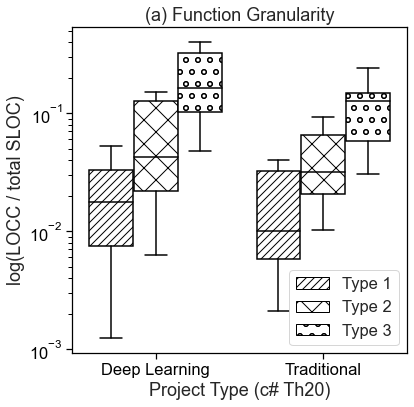

In [244]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set(font_scale=1.5)
sns.set_style('white')
sns.set_style('ticks', {'axes.edgecolor': '0',  
                        'xtick.color': '0',
                        'ytick.color': '0'})
# Define some hatches
hatches = cycle(['///','x', 'o'])


# Boxplot
ax = sns.boxplot(x="project_type", y="LOCC / total SLOC", data=repos_clones_size_csharp_fct,order=["Deep Learning", "Traditional"],
                 showfliers=False, hue='clone_type',color='black',medianprops=dict(color='black'), 
                  boxprops = dict(facecolor='white',edgecolor='black' ))
ax.set_yscale("log")
ax.set(xlabel='Project Type (c# Th20)', ylabel='log(LOCC / total SLOC)')
#plt.legend(loc='best')
plt.title('(a) Function Granularity')
patches=[]
for i, patch in enumerate(ax.artists):
    # Boxes from left to right
    hatch = next(hatches)
    patch.set_hatch(hatch)
    if patch not in patches:
        patches.append(patch)

type1_patch = Patch(fc='white',edgecolor='black', label='Type 1', hatch='///')
type2_patch = Patch( fc='white',edgecolor='black',label='Type 2',     hatch ='x')
type3_patch = Patch(fc='white',edgecolor='black', label='Type 3',     hatch ='o')
legend=plt.legend(handles=[type1_patch, type2_patch, type3_patch],loc='best')
frame = legend.get_frame()
plt.show()
fig = ax.get_figure()
fig.savefig("images_pdf/csharp_dl_trad_clone_types_fct_20.pdf",bbox_inches='tight')

## C\# -By Clone Types-Block granularity

In [245]:
repos_clones_size = repos_clones_size_csharp_blk
traditional = repos_clones_size[repos_clones_size['project_type']=='Traditional']
dl = repos_clones_size[repos_clones_size['project_type']=='Deep Learning']

In [246]:
traditional['clone_type'] = traditional.apply(capitalize, axis=1)
dl['clone_type'] = dl.apply(capitalize, axis=1)

In [247]:
trad_type1 = traditional[traditional['clone_type']=='Type 1']
trad_type2 = traditional[traditional['clone_type']=='Type 2']
trad_type3 = traditional[traditional['clone_type']=='Type 3']

dl_type1 = dl[dl['clone_type']=='Type 1']
dl_type2 = dl[dl['clone_type']=='Type 2']
dl_type3 = dl[dl['clone_type']=='Type 3']

In [248]:
stats.mannwhitneyu(trad_type1.LOCC_total_SLOC,dl_type1.LOCC_total_SLOC, alternative='two-sided')

MannwhitneyuResult(statistic=73.0, pvalue=0.39576568734555595)

In [194]:
stats.mannwhitneyu(trad_type2.LOCC_total_SLOC,dl_type2.LOCC_total_SLOC, alternative='two-sided')

MannwhitneyuResult(statistic=80.0, pvalue=0.42134823269748845)

In [195]:
stats.mannwhitneyu(trad_type3.LOCC_total_SLOC,dl_type3.LOCC_total_SLOC, alternative='two-sided')

MannwhitneyuResult(statistic=49.0, pvalue=0.025849690449110427)

In [196]:
cliffsDelta(trad_type1.LOCC_total_SLOC,dl_type1.LOCC_total_SLOC)

0.1978021978021978

In [197]:
cliffsDelta(trad_type2.LOCC_total_SLOC,dl_type2.LOCC_total_SLOC)

0.1836734693877551

In [198]:
cliffsDelta(trad_type3.LOCC_total_SLOC,dl_type3.LOCC_total_SLOC)

0.5

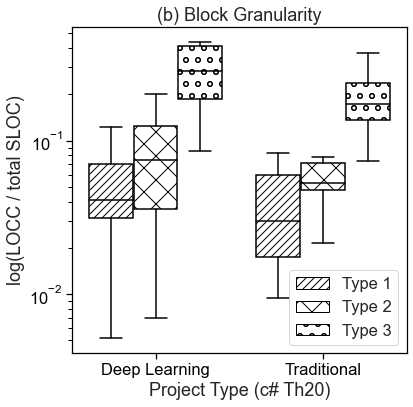

In [249]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set(font_scale=1.5)
sns.set_style('white')
sns.set_style('ticks', {'axes.edgecolor': '0',  
                        'xtick.color': '0',
                        'ytick.color': '0'})
# Define some hatches
hatches = cycle(['///','x', 'o'])


# Boxplot
ax = sns.boxplot(x="project_type", y="LOCC / total SLOC", data=repos_clones_size_csharp_blk,order=["Deep Learning", "Traditional"],
                 showfliers=False, hue='clone_type',color='black',medianprops=dict(color='black'), 
                  boxprops = dict(facecolor='white',edgecolor='black' ))
ax.set_yscale("log")
ax.set(xlabel='Project Type (c# Th20)', ylabel='log(LOCC / total SLOC)')
#plt.legend(loc='best')
plt.title('(b) Block Granularity')
patches=[]
for i, patch in enumerate(ax.artists):
    # Boxes from left to right
    hatch = next(hatches)
    patch.set_hatch(hatch)
    if patch not in patches:
        patches.append(patch)

type1_patch = Patch(fc='white',edgecolor='black', label='Type 1', hatch='///')
type2_patch = Patch( fc='white',edgecolor='black',label='Type 2',     hatch ='x')
type3_patch = Patch(fc='white',edgecolor='black', label='Type 3',     hatch ='o')
legend=plt.legend(handles=[type1_patch, type2_patch, type3_patch],loc='best')
frame = legend.get_frame()
plt.show()
fig = ax.get_figure()
fig.savefig("images_pdf/csharp_dl_trad_clone_types_blk_20.pdf",bbox_inches='tight')